# Prosper Loan Data
## A look into Estimated Expected Yield

### Dataset overview : 

#### Prosper Loan Data from November 9, 2005 through March 10, 2014

A full dataset of various information about loans provided, in our exploration the thing we found most interesting
was the impact of a few factors on the Yield of the loan. However other points of note will also be discussed.

In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

bcolor = sns.color_palette()[0]

In [114]:
# bring in dataframe 
df = pd.read_csv(r'prosperLoanData.csv')
df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
df.shape

(113937, 81)

In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

### Initial pass thoughts
This needs to be broken into multiple dataframes during cleaning process
Large numbers of columns have 'Nulls', this may or may not be a problem later
Need to identify the columns that should be together. 

#### I intend to use the column "ListingKey" as the reference point for all other dataframes as it is a full column. 


In [7]:
# This cell for checking each row before making the corrections list below, the code varied row by row
df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

#### Cleaning items list:
* CreditGrade should be categorical and orderd
** AA, A, B, C, D, E, NC, HR
** NC (Likely for 'No Credit') is higher than HR (Likely for 'High Risk')
** CreditGrade and ProsperRating (Alpha) should possibly be combined into one column
* ListingCreationDate should be a datetime datatype
* ClosedDate should be a datetime datatype
* ProsperRating (numeric)could be converted to int format maybe
* ProsperRating (Alpha) should be categorical and ordered
** AA, A, B, C, D, E, HR
** ProsperRating (Alpha) and CreditGrade should possibly be combined into one column for analysis
* DateCreditPulled should be a datetime datatype
* Employment status should be categorical and ordered
** Employed, Full-time, Self-employed, Part-time, Retired, Not employed, Other, Not available
* DateCreditPulled should be a datetime datatype
* CurrentCreditLines should be an int data type
* OpenCreditLines      "    "  "   "   "   " 
* TotalCreditLinespast7years " " " "   "   " 
* InquiriesLast6Months "    "  "   "   "   " 
* InquiriesLast6Months "    "  "   "   "   " 
* CurrentDelinquencies "    "  "   "   "   "
* DelinquenciesLast7Years "    "  "   "   "   "         
* PublicRecordsLast10Years"    "  "   "   "   "           
* PublicRecordsLast12Months"    "  "   "   "   " 
* TotalTrades"    "  "   "   "   "
* TradesOpenedLast6Months"    "  "   "   "   "
* IncomeRange should be a categorical data type and ordered
** 100,000+, 75,000-99,999, 50,000-74,999, 25,000-49,999, 1-24,999, 0, Not displayed, Not employed
* TotalProsperLoans  should be an int data type
* OnTimeProsperPayments "    "  "   "   "   "
* ProsperPaymentsLessThanOneMonthLate 
* ProsperPaymentsOneMonthPlusLate 
* LoanFirstDefaultedCycleNumber
* LoanOriginationDate should be a datetime datatype

* Nulls will need to be dealt with as well.

#### Tidying list :
The following columns should be grouped together before changes are made (colors are used in Excel to group
prospective dataframes for intial pass to reduce each to a single observational unit):


* ListingKey (Yellow)
** ListingNumber
** ListingCreationDate
** ProsperPrincipalBorrowed
** ProsperPrincipalOutstanding
** MemberKey
** MonthlyLoanPayment
** PercentFunded
** Recommendations
** InvestmentFromFriendsCount
** InvestmentFromFriendsAmount
** Investors


* CreditGrade (Olive)
** ListingKey
** ProsperRating(numeric/Alpha)
** DateCreditPulled
** CreditScoreRange(Lower/Upper)
** ScorexChangeAtTimeOfListing


* BorrowerAPR (Orange)
** ListingKey
** BorrowerRate
** LenderYield
** EstimatedEffectiveYield
** EstimatedLoss
** EstimatedReturn
** ProsperScore


* BorrowerState (Flesh)
** ListingKey
** IsBorrowerHomeowner
** ListingCategory


* CurrentlyInGroup (dark blue)
** ListingKey
** GroupKey


* FirstRecordedCreditLine (red)
** ListingKey
** CurrentCreditLines
** OpenCreditLines
** TotalCreditLinespast7years
** OpenRevolvingAccounts
** OpenRevolvingMonthlyPayment
** RevolvingCreditBalance
** BankcardUtilization
** AvailableBankcardCredit


* InquiriesLast6Months (pink)
** ListingKey
** TotalInquiries
** CurrentDelinquencies


* AmountDelinquent (grey)
** ListingKey
** DelinquenciesLast7Years
** DebtToIncomeRatio
** ProsperPaymentsLessThanOneMonthLate
** ProsperPaymentsOneMonthPlusLate
** LoanCurrentDaysDelinquent
** LoanFirstDefaultedCycleNumber
** LoanMonthsSinceOrigination
** LoanNumber
** LoanOriginalAmount
** LoanOriginationDate
** LoanOriginationQuarter


* Term (white)
** ListingKey
** LoanStatus
** ClosedDate


* LoanKey (lblue)
** ListingKey
** TotalProsperLoans
** TotalProsperPaymentsBilled
** OnTimeProsperPayments
** LP_CustomerPayments
** LP_CustomerPrincipalPayments
** LP_InterestandFees
** LP_ServiceFees
** LP_CollectionFees
** LP_GrossPrincipalLoss
** LP_NetPrincipalLoss
** LP_NonPrincipalRecoverypayments

#### Initial Dataframe organization block

In [8]:
# First create the individual dataframes, all modifications of data type can be done on the copies.
# Lists by color group to form appropriate dataframes.
yellow = ['ListingKey', 'ListingNumber','ListingCreationDate','ProsperPrincipalBorrowed',
          'ProsperPrincipalOutstanding','MemberKey','PercentFunded',
          'Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']
olive = ['CreditGrade','ListingKey','ProsperRating (numeric)','ProsperRating (Alpha)','DateCreditPulled',
         'CreditScoreRangeLower', 'CreditScoreRangeUpper','ScorexChangeAtTimeOfListing', 'ProsperScore', 
         'PublicRecordsLast12Months','PublicRecordsLast10Years']
orange = ['ListingKey','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn']
flesh = ['ListingKey','IsBorrowerHomeowner','ListingCategory (numeric)']
dblue = ['ListingKey','CurrentlyInGroup','GroupKey']
red = ['ListingKey','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years',
       'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','RevolvingCreditBalance',
       'BankcardUtilization','AvailableBankcardCredit']
pink = ['InquiriesLast6Months','ListingKey','TotalInquiries','CurrentDelinquencies','DelinquenciesLast7Years',
       'LoanCurrentDaysDelinquent']
grey = ['ListingKey','DebtToIncomeRatio','ProsperPaymentsLessThanOneMonthLate',
        'ProsperPaymentsOneMonthPlusLate','LoanFirstDefaultedCycleNumber',
        'LoanMonthsSinceOrigination','LoanNumber','LoanOriginalAmount','LoanOriginationDate',
        'LoanOriginationQuarter']
white = ['Term','ListingKey','LoanStatus','ClosedDate']
brown = ['ListingKey','IncomeRange','IncomeVerifiable','StatedMonthlyIncome']
dgreen = ['ListingKey','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months']
lblue = ['ListingKey', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
         'MonthlyLoanPayment', 'LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
         'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
         'LP_NonPrincipalRecoverypayments',]
purple = ['ListingKey', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration']

In [9]:
# Use lists to create dataframes based on desired observation columns. 
df_Funded = df[yellow].copy()
df_CScore = df[olive].copy()
df_Rate = df[orange].copy()
df_List = df[flesh].copy()
df_Group = df[dblue].copy()
df_Revolv = df[red].copy()
df_Delinquent = df[pink].copy()
df_Amount = df[grey].copy()
df_Status = df[white].copy()
df_Trades = df[dgreen].copy()
df_Income = df[brown].copy()
df_Payments = df[lblue].copy()
df_Employment = df[purple].copy()

In [10]:
#Check manageablility of dataframe
print(df_Funded.shape)
print(df_CScore.shape)
print(df_Rate.shape)
print(df_List.shape)
print(df_Group.shape)
print(df_Revolv.shape)
print(df_Delinquent.shape)
print(df_Amount.shape)
print(df_Status.shape)
print(df_Trades.shape)
print(df_Income.shape)
print(df_Payments.shape)
print(df_Employment.shape)

(113937, 11)
(113937, 11)
(113937, 7)
(113937, 3)
(113937, 3)
(113937, 9)
(113937, 6)
(113937, 10)
(113937, 4)
(113937, 4)
(113937, 4)
(113937, 14)
(113937, 4)


#### Datatype correction block

In [11]:
# correct datatypes as listed above
# Create categorical lists
#For CreditGrade & ProsperRating (Alpha)
alpha_ratings = ['AA','A','B','C','D','E','NC','HR']
alrat = pd.CategoricalDtype(categories = alpha_ratings, ordered = True)
#For Employment status
emp_status = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Retired', 'Not employed',
              'Other', 'Not available']
empstat = pd.CategoricalDtype(categories = emp_status, ordered = True)
#For Income Range
inc_range = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0',
            'Not displayed', 'Not employed']
incran = pd.CategoricalDtype(categories = inc_range, ordered = True)

In [12]:
#alter datatypes in dataframes
# df_Funded
df_Funded.ListingCreationDate = pd.to_datetime(df_Funded.ListingCreationDate)
df_Funded['ProsperPrincipalBorrowed'].fillna(value = 0, inplace = True)
df_Funded['ProsperPrincipalOutstanding'].fillna(value = 0, inplace = True)

In [13]:
# alter datatypes in dataframes
#df_CScore
df_CScore.CreditGrade = df_CScore.CreditGrade.astype(alrat)
df_CScore['ProsperRating (Alpha)'] = df_CScore['ProsperRating (Alpha)'].astype(alrat)
df_CScore.DateCreditPulled = pd.to_datetime(df_CScore.DateCreditPulled)
# fillna for na values in 'ProsperRating'
df_CScore['ProsperRating (numeric)'].fillna(value = 0, inplace = True)
df_CScore['ProsperRating (numeric)'] = df_CScore['ProsperRating (numeric)'].astype(int)
df_CScore['PublicRecordsLast10Years'].fillna(value = 0, inplace = True)
df_CScore['PublicRecordsLast12Months'].fillna(value = 0, inplace = True)
df_CScore['PublicRecordsLast10Years'] = df_CScore['PublicRecordsLast10Years'].astype(int)
df_CScore['PublicRecordsLast12Months'] = df_CScore['PublicRecordsLast12Months'].astype(int)
df_CScore['ScorexChangeAtTimeOfListing'].fillna(value = 0, inplace = True)
df_CScore['ProsperScore'].fillna(value = 0, inplace = True)
df_CScore['ProsperScore'] = df_CScore['ProsperScore'].astype(int)

In [14]:
# df_revolv fix datatypes
df_Revolv['CurrentCreditLines'].fillna(value = 0, inplace = True)
df_Revolv['OpenCreditLines'].fillna(value = 0, inplace = True)
df_Revolv['TotalCreditLinespast7years'].fillna(value = 0, inplace = True)
df_Revolv['OpenRevolvingAccounts'].fillna(value = 0, inplace = True)
df_Revolv['CurrentCreditLines'] = df_Revolv['CurrentCreditLines'].astype(int)
df_Revolv['OpenCreditLines'] = df_Revolv['OpenCreditLines'].astype(int)
df_Revolv['TotalCreditLinespast7years'] = df_Revolv['TotalCreditLinespast7years'].astype(int)
df_Revolv['OpenRevolvingAccounts'] = df_Revolv['OpenRevolvingAccounts'].astype(int)


In [15]:
# df_delinquent fix data types
df_Delinquent['CurrentDelinquencies'].fillna(value = 0, inplace = True)
df_Delinquent['InquiriesLast6Months'].fillna(value = 0, inplace = True)
df_Delinquent['CurrentDelinquencies'] = df_Delinquent['CurrentDelinquencies'].astype(int)
df_Delinquent['InquiriesLast6Months'] = df_Delinquent['InquiriesLast6Months'].astype(int)
df_Delinquent['DelinquenciesLast7Years'].fillna(value = 0, inplace = True)
df_Delinquent['DelinquenciesLast7Years'] = df_Delinquent['DelinquenciesLast7Years'].astype(int)

In [16]:
#df_amount fix datatypes

df_Amount['ProsperPaymentsLessThanOneMonthLate'].fillna(value = 0, inplace = True)
df_Amount['ProsperPaymentsLessThanOneMonthLate'] = df_Amount['ProsperPaymentsLessThanOneMonthLate'].astype(int)
df_Amount['ProsperPaymentsOneMonthPlusLate'].fillna(value = 0, inplace = True)
df_Amount['ProsperPaymentsOneMonthPlusLate'] = df_Amount['ProsperPaymentsOneMonthPlusLate'].astype(int)
df_Amount['LoanFirstDefaultedCycleNumber'].fillna(value = 0, inplace = True)
df_Amount['LoanFirstDefaultedCycleNumber'] = df_Amount['LoanFirstDefaultedCycleNumber'].astype(int)
df_Amount['LoanOriginationDate'] = pd.to_datetime(df_Amount['LoanOriginationDate'])

In [17]:
# df_trades fix datatypes
df_Trades['TotalTrades'].fillna(value = 0 , inplace = True)
df_Trades['TradesOpenedLast6Months'].fillna(value = 0, inplace = True)
df_Trades['TotalTrades'] = df_Trades['TotalTrades'].astype(int)
df_Trades['TradesOpenedLast6Months'] = df_Trades['TradesOpenedLast6Months'].astype(int)

In [18]:
# df_payments fix datatypes
df_Payments['TotalProsperLoans'].fillna(value = 0, inplace = True)
df_Payments['TotalProsperPaymentsBilled'].fillna(value = 0, inplace = True)
df_Payments['OnTimeProsperPayments'].fillna(value = 0, inplace = True)
df_Payments['TotalProsperLoans'] = df_Payments['TotalProsperLoans'].astype(int)
df_Payments['TotalProsperPaymentsBilled'] = df_Payments['TotalProsperPaymentsBilled'].astype(int)
df_Payments['OnTimeProsperPayments'] = df_Payments['OnTimeProsperPayments'].astype(int)

#### Null correction block

In [19]:
# check for remaining nulls
print(df_Funded.info())
print(df_CScore.info())
print(df_Rate.info())
print(df_List.info())
print(df_Group.info())
print(df_Revolv.info())
print(df_Delinquent.info())
print(df_Amount.info())
print(df_Status.info())
print(df_Trades.info())
print(df_Income.info())
print(df_Payments.info())
print(df_Employment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ListingKey                   113937 non-null  object        
 1   ListingNumber                113937 non-null  int64         
 2   ListingCreationDate          113937 non-null  datetime64[ns]
 3   ProsperPrincipalBorrowed     113937 non-null  float64       
 4   ProsperPrincipalOutstanding  113937 non-null  float64       
 5   MemberKey                    113937 non-null  object        
 6   PercentFunded                113937 non-null  float64       
 7   Recommendations              113937 non-null  int64         
 8   InvestmentFromFriendsCount   113937 non-null  int64         
 9   InvestmentFromFriendsAmount  113937 non-null  float64       
 10  Investors                    113937 non-null  int64         
dtypes: datetime64[ns](1), floa

In [20]:
#create combined CreditGrade and ProsperRating (Alpha) column
df_CScore['combRating'] = df_CScore.CreditGrade.fillna(df_CScore['ProsperRating (Alpha)'])

In [21]:
#fill na in combRating column
df_CScore.combRating.fillna(value = 'NC', inplace = True)

In [22]:
#drop CreditGrade and ProsperRating (Alpha) columns
df_CScore.drop(columns = ['CreditGrade','ProsperRating (Alpha)'], inplace = True)

In [23]:
# fill creditscorerange(lower/upper) nulls and create delta column
df_CScore.CreditScoreRangeLower.fillna(value = 0, inplace = True)
df_CScore.CreditScoreRangeUpper.fillna(value = 0, inplace = True)
df_CScore['deltaCreditScore'] = df_CScore.CreditScoreRangeUpper - df_CScore.CreditScoreRangeLower

In [24]:
# verify column completion.
df_CScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ListingKey                   113937 non-null  object        
 1   ProsperRating (numeric)      113937 non-null  int32         
 2   DateCreditPulled             113937 non-null  datetime64[ns]
 3   CreditScoreRangeLower        113937 non-null  float64       
 4   CreditScoreRangeUpper        113937 non-null  float64       
 5   ScorexChangeAtTimeOfListing  113937 non-null  float64       
 6   ProsperScore                 113937 non-null  int32         
 7   PublicRecordsLast12Months    113937 non-null  int32         
 8   PublicRecordsLast10Years     113937 non-null  int32         
 9   combRating                   113937 non-null  category      
 10  deltaCreditScore             113937 non-null  float64       
dtypes: category(1), datetime64

In [25]:
# clean df_Rate's nulls 
df_Rate.fillna(value = 0, inplace = True)
df_Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingKey               113937 non-null  object 
 1   BorrowerAPR              113937 non-null  float64
 2   BorrowerRate             113937 non-null  float64
 3   LenderYield              113937 non-null  float64
 4   EstimatedEffectiveYield  113937 non-null  float64
 5   EstimatedLoss            113937 non-null  float64
 6   EstimatedReturn          113937 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.1+ MB


In [26]:
# For df_Group, since we are only interested in seeing if a group exists, or not, and we have
# a boolean fully filled column next to it we do not need to clean up the nulls in the column labeled 'GroupKey'

In [27]:
# Fill with zeros all nulls, which in this case is effectively the same as not having a balance/account
df_Revolv['RevolvingCreditBalance'].fillna(value = 0, inplace = True)
df_Revolv['BankcardUtilization'].fillna(value = 0, inplace = True)
df_Revolv['AvailableBankcardCredit'].fillna(value = 0, inplace = True)
df_Revolv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingKey                   113937 non-null  object 
 1   CurrentCreditLines           113937 non-null  int32  
 2   OpenCreditLines              113937 non-null  int32  
 3   TotalCreditLinespast7years   113937 non-null  int32  
 4   OpenRevolvingAccounts        113937 non-null  int32  
 5   OpenRevolvingMonthlyPayment  113937 non-null  float64
 6   RevolvingCreditBalance       113937 non-null  float64
 7   BankcardUtilization          113937 non-null  float64
 8   AvailableBankcardCredit      113937 non-null  float64
dtypes: float64(4), int32(4), object(1)
memory usage: 6.1+ MB


In [28]:
# Fill df_Delinquent total inquiries. AND change the datatype to the proper datatype (this was missed above)
df_Delinquent.TotalInquiries.fillna(value = '0', inplace = True)
df_Delinquent.TotalInquiries = df_Delinquent.TotalInquiries.astype(int)
df_Delinquent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   InquiriesLast6Months       113937 non-null  int32 
 1   ListingKey                 113937 non-null  object
 2   TotalInquiries             113937 non-null  int32 
 3   CurrentDelinquencies       113937 non-null  int32 
 4   DelinquenciesLast7Years    113937 non-null  int32 
 5   LoanCurrentDaysDelinquent  113937 non-null  int64 
dtypes: int32(4), int64(1), object(1)
memory usage: 3.5+ MB


In [29]:
#fix df_Amount nulls Debt to income ratio nulls make no sense, if you have no debt '0' is fine, if you do
# then it isn't a null already.
df_Amount.DebtToIncomeRatio.fillna(value = 0, inplace = True)
df_Amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   DebtToIncomeRatio                    113937 non-null  float64       
 2   ProsperPaymentsLessThanOneMonthLate  113937 non-null  int32         
 3   ProsperPaymentsOneMonthPlusLate      113937 non-null  int32         
 4   LoanFirstDefaultedCycleNumber        113937 non-null  int32         
 5   LoanMonthsSinceOrigination           113937 non-null  int64         
 6   LoanNumber                           113937 non-null  int64         
 7   LoanOriginalAmount                   113937 non-null  int64         
 8   LoanOriginationDate                  113937 non-null  datetime64[ns]
 9   LoanOriginationQuarter               113937 non-null  object        
d

In [30]:
# Closed date should be datetime. it is okay for this status to have nulls as some loans are not yet closed. 
df_Status.ClosedDate = pd.to_datetime(df_Status.ClosedDate)
df_Status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Term        113937 non-null  int64         
 1   ListingKey  113937 non-null  object        
 2   LoanStatus  113937 non-null  object        
 3   ClosedDate  55089 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.5+ MB


In [31]:
# Trades never delinquent is a percentage. The nulls are likely people who have no trades
# For this reason I am assigning "2" to this column as no one can have 200% non-delinquent trades
# But someone could have 0% never delinquent trades... this will allow me to clean it up further later
# if needed for further analysis
df_Trades['TradesNeverDelinquent (percentage)'].fillna(value = 2, inplace = True)
df_Trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   TotalTrades                         113937 non-null  int32  
 2   TradesNeverDelinquent (percentage)  113937 non-null  float64
 3   TradesOpenedLast6Months             113937 non-null  int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 2.6+ MB


In [32]:
# Income range should be converted to categorical datatype
df_Income.IncomeRange = df_Income.IncomeRange.astype(incran)
df_Income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ListingKey           113937 non-null  object  
 1   IncomeRange          113937 non-null  category
 2   IncomeVerifiable     113937 non-null  bool    
 3   StatedMonthlyIncome  113937 non-null  float64 
dtypes: bool(1), category(1), float64(1), object(1)
memory usage: 2.0+ MB


In [33]:
#df_Employment 
df_Employment.Occupation.fillna(value = 'Unknown', inplace = True)
df_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   Occupation                113937 non-null  object 
 2   EmploymentStatus          111682 non-null  object 
 3   EmploymentStatusDuration  106312 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.5+ MB


### Initial Analysis of the data frames:

df_Funded

df_CScore

df_Rate

df_List

df_Group

df_Revolv

df_Delinquent

df_Amount

df_Status

df_Trades

df_Income

df_Payments

df_Employment

#### Univariate Visual analysis of important factors.

In [34]:
# For Funded, we're most intersted in the Investors number
df_Funded.describe()

,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,1642.232196,567.997952,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,4670.954909,2037.268511,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,72499.000000,23450.950000,1.012500,39.000000,33.000000,25000.000000,1189.000000


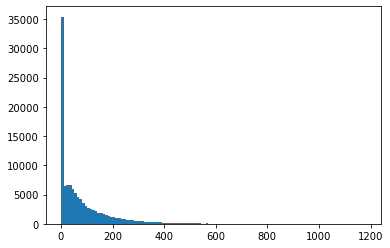

In [35]:
# Histogram of full investors range
bins = np.arange(1, 1190, 10)
plt.hist(df_Funded.Investors, bins = bins);

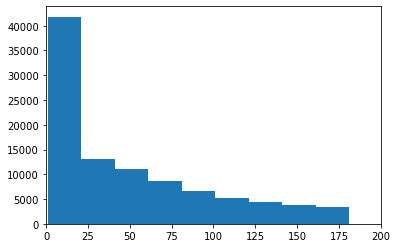

In [36]:
# Narrowing the range down to where the bulk of our right skewed data lie, below 200
bins = np.arange(1, 200, 20)
plt.hist(df_Funded.Investors, bins = bins)
plt.xlim(0,200);

The largest group of investors is between 1 and 20 and rapidly falls off to a right skewed amount as the number of investors 
increases.

In [37]:
# For CScore, we're interested in the Credit Scores themselves. 
df_CScore.head()

,ListingKey,ProsperRating (numeric),DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,ScorexChangeAtTimeOfListing,ProsperScore,PublicRecordsLast12Months,PublicRecordsLast10Years,combRating,deltaCreditScore
0,1021339766868145413AB3B,0,2007-08-26 18:41:46.780,640.0,659.0,0.0,0,0,0,C,19.0
1,10273602499503308B223C1,6,2014-02-27 08:28:14.000,680.0,699.0,0.0,7,0,1,A,19.0
2,0EE9337825851032864889A,0,2007-01-02 14:09:10.060,480.0,499.0,0.0,0,0,0,HR,19.0
3,0EF5356002482715299901A,6,2012-10-22 11:02:32.000,800.0,819.0,0.0,9,0,0,A,19.0
4,0F023589499656230C5E3E2,3,2013-09-14 18:38:44.000,680.0,699.0,0.0,4,0,0,D,19.0


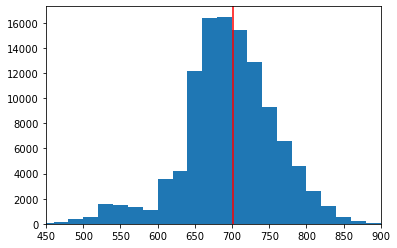

In [38]:
# Historgam of the bulk range between 450 and 899 for the upper limit
bins = np.arange(0, 1000, 20)
plt.hist(df_CScore.CreditScoreRangeUpper, bins = bins)
plt.xlim(450,900)
plt.axvline(df_CScore.CreditScoreRangeUpper.mean(), color = 'r');

This shows us the median number of the upper range for credit scores.

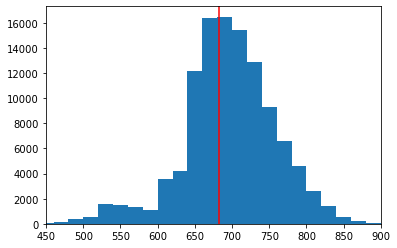

In [39]:
# Historgam of the bulk range between 450 and 899 for the lower limit
bins = np.arange(0, 1000, 20)
plt.hist(df_CScore.CreditScoreRangeLower, bins = bins)
plt.xlim(450,900)
plt.axvline(df_CScore.CreditScoreRangeLower.mean(), color = 'r');

The median range of lower credit scores

<AxesSubplot:xlabel='combRating', ylabel='count'>

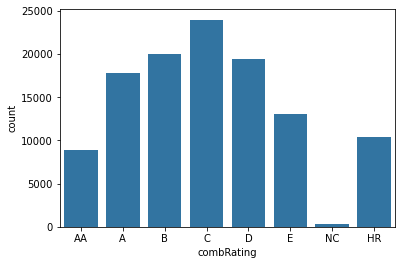

In [40]:
sns.countplot(data = df_CScore, x = 'combRating', color = bcolor)

We can see the approximate normal distribution of credit ratings here, where C is the median rating. The number of No Credit
applications is relatively small, but otherwise this fits a normal distribution nicely.

In [41]:
# I think here we're really more interested in effective yield.
df_Rate.describe()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn
count,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,0.218780,0.192764,0.182701,0.125608,0.059807,0.071546
std,0.080421,0.074818,0.074516,0.094335,0.053428,0.049426
min,0.000000,0.000000,-0.010000,-0.182700,0.000000,-0.182700
25%,0.156290,0.134000,0.124200,0.000000,0.000000,0.000000
50%,0.209710,0.184000,0.173000,0.131440,0.052400,0.079900
75%,0.283700,0.250000,0.240000,0.195200,0.097500,0.108700
max,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700


<AxesSubplot:xlabel='EstimatedEffectiveYield', ylabel='Density'>

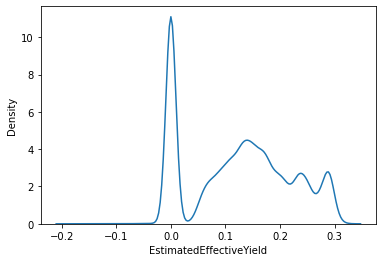

In [42]:
# Kdeplot for estimated effective yield
sns.kdeplot(df_Rate.EstimatedEffectiveYield)

Here we can see the multimodal distribution of yield, notice that around 1.3 it becomes almost normal off to either side, with a large spike around zero, and two smaller spikes at 2.3 and 3.0. We will investigate this further.

In [43]:
# In df_List we're most interested in "IsBorrowerHomeOwner", but ListingCategory may also come into play
df_List.head()

,ListingKey,IsBorrowerHomeowner,ListingCategory (numeric)
0,1021339766868145413AB3B,True,0
1,10273602499503308B223C1,False,2
2,0EE9337825851032864889A,False,0
3,0EF5356002482715299901A,True,16
4,0F023589499656230C5E3E2,True,2


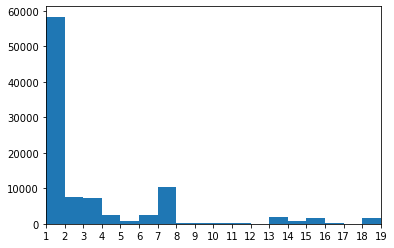

In [44]:
#Histogram for listingcategory
bins = np.arange(df_List['ListingCategory (numeric)'].min(),df_List['ListingCategory (numeric)'].max(), 1)
plt.hist(data = df_List, x = 'ListingCategory (numeric)', bins = bins);
plt.xlim(1,19)
plt.xticks(np.arange(1,20,1));

Histogram of listing categories. These are arbitrarily assinged values and show no clear pattern as a result.

In [45]:
# for df_Group this isn't a dataframe to be used by itself, but possibly for comparisons later.
df_Group.head()

,ListingKey,CurrentlyInGroup,GroupKey
0,1021339766868145413AB3B,True,NaN
1,10273602499503308B223C1,False,NaN
2,0EE9337825851032864889A,True,783C3371218786870A73D20
3,0EF5356002482715299901A,False,NaN
4,0F023589499656230C5E3E2,False,NaN


In [46]:
# for df_Revolv
df_Revolv.describe()

,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit
count,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,1.139370e+05,113937.000000,113937.000000
mean,9.628637,8.642153,26.590870,6.96979,398.292161,1.642419e+04,0.523848,10467.973670
std,5.867722,5.374413,13.755212,4.63097,447.159711,3.212006e+04,0.337565,19352.809288
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,6.000000,5.000000,17.000000,4.00000,114.000000,2.091000e+03,0.230000,531.000000
50%,9.000000,8.000000,25.000000,6.00000,271.000000,7.593000e+03,0.560000,3457.000000
75%,13.000000,12.000000,35.000000,9.00000,525.000000,1.825400e+04,0.820000,12078.000000
max,59.000000,54.000000,136.000000,51.00000,14985.000000,1.435667e+06,5.950000,646285.000000


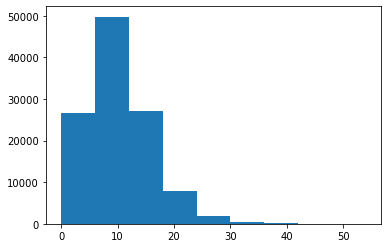

In [47]:
bins = np.arange(0, 60, 6)
plt.hist(df_Revolv.CurrentCreditLines, bins = bins);

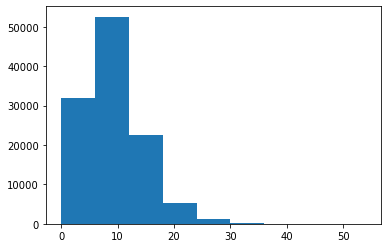

In [48]:
bins = np.arange(0, 60, 6)
plt.hist(df_Revolv.OpenCreditLines, bins = bins);

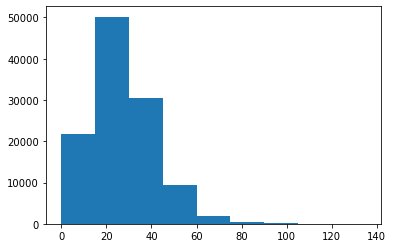

In [49]:
bins = np.arange(0, 140, 15)
plt.hist(df_Revolv.TotalCreditLinespast7years, bins = bins);

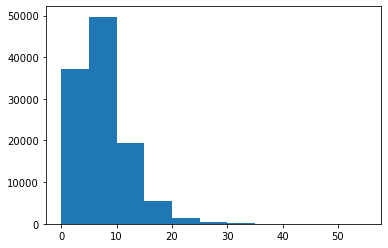

In [50]:
bins = np.arange(0, 60, 5)
plt.hist(df_Revolv.OpenRevolvingAccounts, bins = bins);

Number of credit lines and revolving lines all show similar patterns, they seemed to have little to no effect on yield though.

In [51]:
# for df_Delinquent, we'll be looking at inquiries and delinquencies
df_Delinquent.describe()

,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,DelinquenciesLast7Years,LoanCurrentDaysDelinquent
count,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,1.426306,5.527599,0.588430,4.118881,152.816539
std,2.432615,6.421654,1.973185,10.123325,466.320254
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,0.000000,0.000000,0.000000
75%,2.000000,7.000000,0.000000,3.000000,0.000000
max,105.000000,379.000000,83.000000,99.000000,2704.000000


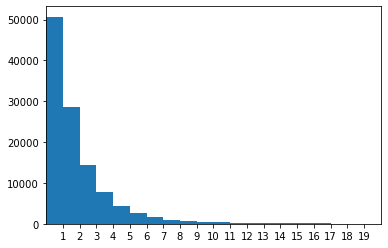

In [52]:
bins = np.arange(0, 106, 1)
plt.hist(df_Delinquent.InquiriesLast6Months, bins = bins)
plt.xlim(0,20)
plt.xticks(np.arange(1,20,1));

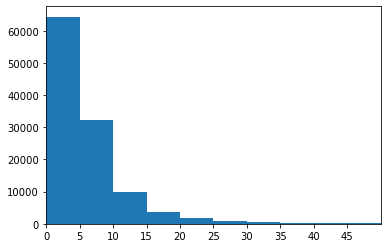

In [53]:
bins = np.arange(0, 379, 5)
plt.hist(df_Delinquent.TotalInquiries, bins = bins)
plt.xlim(0, 50)
plt.xticks(np.arange(0,50,5));

We can see the number of inquiries into credit here. But it has little impact on our question of value.

In [54]:
# df_Amount here we're looking at the amounts borrowed
df_Amount.head()

,ListingKey,DebtToIncomeRatio,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter
0,1021339766868145413AB3B,0.17,0,0,0,78,19141,9425,2007-09-12,Q3 2007
1,10273602499503308B223C1,0.18,0,0,0,0,134815,10000,2014-03-03,Q1 2014
2,0EE9337825851032864889A,0.06,0,0,0,86,6466,3001,2007-01-17,Q1 2007
3,0EF5356002482715299901A,0.15,0,0,0,16,77296,10000,2012-11-01,Q4 2012
4,0F023589499656230C5E3E2,0.26,0,0,0,6,102670,15000,2013-09-20,Q3 2013


C:\Users\Chris\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='Density'>

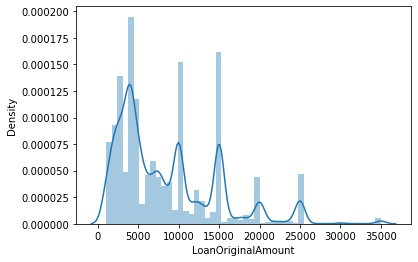

In [55]:
sns.distplot(df_Amount['LoanOriginalAmount'])

Loan original amount is multimodal, and we will see later how this has a direct impact on the expected yield of the loan.

In [56]:
# for df_Status
df_Status.head()

,Term,ListingKey,LoanStatus,ClosedDate
0,36,1021339766868145413AB3B,Completed,2009-08-14
1,36,10273602499503308B223C1,Current,NaT
2,36,0EE9337825851032864889A,Completed,2009-12-17
3,36,0EF5356002482715299901A,Current,NaT
4,36,0F023589499656230C5E3E2,Current,NaT


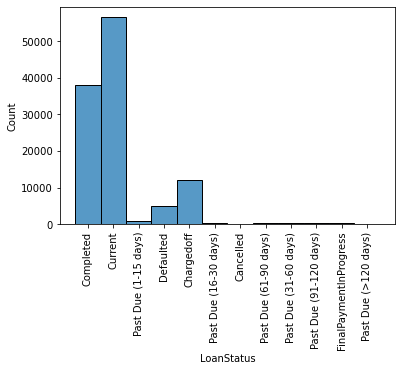

In [57]:
sns.histplot(df_Status.LoanStatus)
plt.xticks(rotation = 'vertical');

Loan status, closed or not, have no impact on our question of interest about yield.

In [58]:
# df_Trades
df_Trades.describe()

,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months
count,113937.000000,113937.000000,113937.000000
mean,21.691926,0.959664,0.749204
std,12.843739,0.311843,1.079275
min,0.000000,0.000000,0.000000
25%,13.000000,0.830000,0.000000
50%,21.000000,0.950000,0.000000
75%,29.000000,1.000000,1.000000
max,126.000000,2.000000,20.000000


(0.0, 80.0)

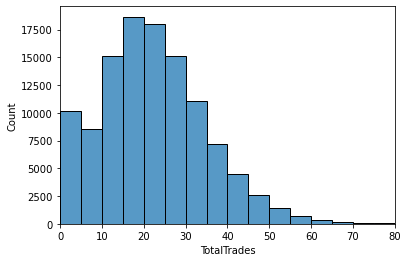

In [59]:
sns.histplot(df_Trades.TotalTrades, bins = np.arange(0, 130, 5))
plt.xlim(0,80)

(0.0, 1.1)

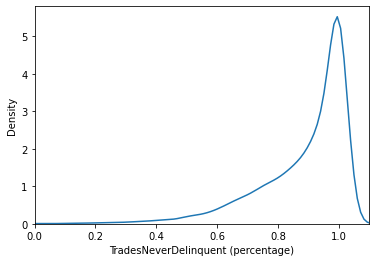

In [60]:
#kde plot with limit of 1.1 (peak is at 1.0) note that there are values out to 2, as assinged earlier.
sns.kdeplot(df_Trades['TradesNeverDelinquent (percentage)'])
plt.xlim(0,1.1)

Trade information was never explored fully, and might be of interest in future studies.

In [61]:
# df_Income
df_Income.head()

,ListingKey,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,1021339766868145413AB3B,"$25,000-49,999",True,3083.333333
1,10273602499503308B223C1,"$50,000-74,999",True,6125.000000
2,0EE9337825851032864889A,Not displayed,True,2083.333333
3,0EF5356002482715299901A,"$25,000-49,999",True,2875.000000
4,0F023589499656230C5E3E2,"$100,000+",True,9583.333333


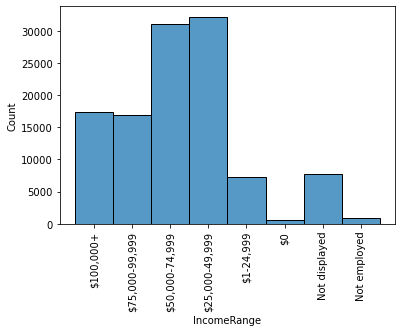

In [117]:
sns.histplot(df_Income.IncomeRange)
plt.xticks(rotation = 'vertical');

Income ranges show us how many of each relative type there is, and we will see it's impact on yield later.

In [63]:
# df_Payments loan payments 
df_Payments.describe()

,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments
count,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,0.275459,4.445483,4.317088,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686
std,0.654774,12.410277,12.093052,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937
min,0.000000,0.000000,0.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000
25%,0.000000,0.000000,0.000000,131.620000,1005.760000,500.890000,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,217.740000,2583.830000,1587.500000,700.840100,-34.440000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,371.580000,5548.400000,4000.000000,1458.540000,-13.920000,0.000000,0.000000,0.000000,0.000000
max,8.000000,141.000000,141.000000,2251.510000,40702.390000,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000


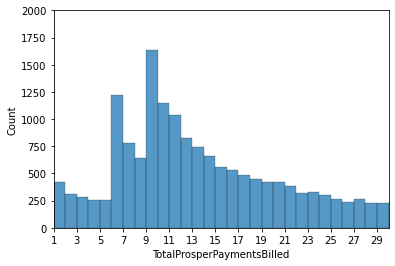

In [64]:
bins = np.arange(0,141,1)
sns.histplot(df_Payments.TotalProsperPaymentsBilled, bins = bins)
plt.xlim(1,30)
plt.ylim(0,2000)
plt.xticks(np.arange(1,30,2));

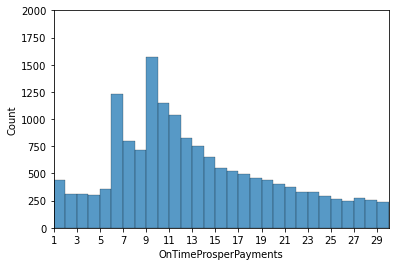

In [65]:
bins = np.arange(0,141,1)
sns.histplot(df_Payments.OnTimeProsperPayments, bins = bins)
plt.xlim(1,30)
plt.ylim(0,2000)
plt.xticks(np.arange(1,30,2));

These graphs of payments are not of interest in our current question, but may be useful for other analysis.

In [66]:
# df_Employment
df_Employment.EmploymentStatus.value_counts(), df.EmploymentStatus.value_counts()

(Employed         67322
 Full-time        26355
 Self-employed     6134
 Not available     5347
 Other             3806
 Part-time         1088
 Not employed       835
 Retired            795
 Name: EmploymentStatus, dtype: int64,
 Employed         67322
 Full-time        26355
 Self-employed     6134
 Not available     5347
 Other             3806
 Part-time         1088
 Not employed       835
 Retired            795
 Name: EmploymentStatus, dtype: int64)

<AxesSubplot:xlabel='Count', ylabel='Occupation'>

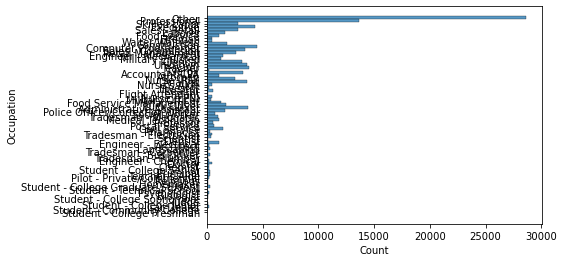

In [67]:
# plot for eployment type
figsize = (60,40)
sns.histplot(y = df_Employment.Occupation)


In [68]:
# Fix datatype for employment status and fill nas
df_Employment.EmploymentStatus.fillna(value = 'Not available', inplace = True)
df_Employment.EmploymentStatus = df_Employment.EmploymentStatus.astype(empstat)
df_Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ListingKey                113937 non-null  object  
 1   Occupation                113937 non-null  object  
 2   EmploymentStatus          113937 non-null  category
 3   EmploymentStatusDuration  106312 non-null  float64 
dtypes: category(1), float64(1), object(2)
memory usage: 2.7+ MB


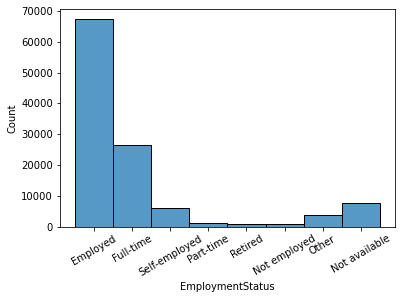

In [119]:
sns.histplot(df_Employment.EmploymentStatus)
plt.xticks(rotation = 30);

Employment status is shown here. In it we can see most loan requesters were "employed" and second most were "full time"

### Begin bivariate exploration. 
#### Questions to ask for this:

How do the following columns interact with one another: 
df_Funded.Investors 

df_CScore.CreditScoreRange(Upper/Lower)

df_CScore.combRating

df_EstimatedEffectiveYeild

df_List['ListingCategory (numeric)']

df_Revolv.CurrentCreditLines

df_Revolv.OpenCreditLines

df_Revolv.TotalCreditLinespast7years

df_Revolv.OpenRevolvingAccounts

df_Delinquent.InquiriesLast6Months

df_Delinquent.TotalInquiries

df_Amount['LoanOriginalAmount']

df_Status.LoanStatus

df_Trades.TotalTrades

df_Trades['TradesNeverDelinquent (percentage)']

df_Income.IncomeRange

df_Payments.TotalProsperPaymentsBilled

df_Payments.OnTimeProsperPayments

df_Employment.Occupation

df_Employment.EmploymentStatus

#### Predictions:

* Credit score range will be related to income, ontime payments, number of credit lines. 
* Trades will be related to income, occupation
* more inquiries means more delinquent or lower scores possibly

In [70]:
# lets first look at the number of investors vs the credit score.

df_IvCS = pd.merge(df_Funded, df_CScore, how = 'inner', on = 'ListingKey')
df_IvCS.describe()

,ListingNumber,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperRating (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,ScorexChangeAtTimeOfListing,ProsperScore,PublicRecordsLast12Months,PublicRecordsLast10Years,deltaCreditScore
count,1.157870e+05,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000
mean,6.342584e+05,1649.676709,568.153155,0.998606,0.047294,0.023085,16.286309,79.641048,3.054851,682.158792,701.061812,-0.525733,4.449688,0.013879,0.310536,18.903020
std,3.295091e+05,4688.955305,2038.792636,0.017776,0.329790,0.230567,292.190230,103.011008,2.283703,82.053115,82.866515,20.293475,3.300052,0.147782,0.724168,1.353967
min,4.000000e+00,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,0.000000
25%,4.080325e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,660.000000,679.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,6.060430e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,43.000000,3.000000,680.000000,699.000000,0.000000,5.000000,0.000000,0.000000,19.000000
75%,9.083635e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,114.000000,5.000000,720.000000,739.000000,0.000000,7.000000,0.000000,0.000000,19.000000
max,1.255725e+06,72499.000000,23450.950000,1.012500,39.000000,33.000000,25000.000000,1189.000000,7.000000,880.000000,899.000000,286.000000,11.000000,20.000000,38.000000,19.000000


(400.0, 950.0)

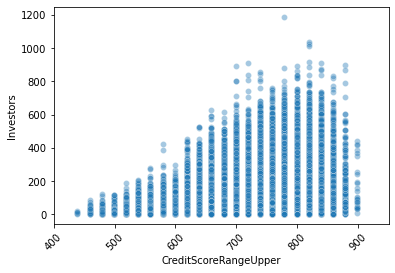

In [71]:
bins = [(np.arange(650, 900, 30)),(np.arange(1, 1190, 10))]
sns.scatterplot(data = df_IvCS, x = 'CreditScoreRangeUpper', y = 'Investors', alpha = .4)
plt.xticks(rotation = 45)
plt.xlim(400,950)


Notice the shape of the curve, the higher the credit score, the more individual investors there are for the loans. We will see later that this is due to the lower rate of yield provided by these loans.   

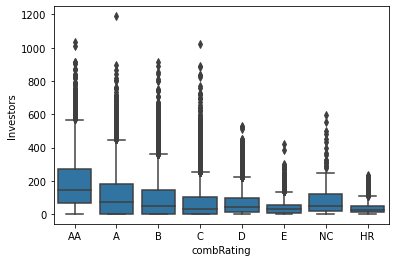

In [72]:
# investors vs combRating

sns.boxplot(data = df_IvCS, x = 'combRating', y = 'Investors', color = bcolor);

Unsurprisingly highrisk (HR) has fewest investors , But class D has a higher median than class C does, even though
its range is narrower. Those with no credit (NC) have a median about the same as class D, but with broader range, which is larger even than class C. 

In [73]:
# credit score vs. effective yield. 
df_RvCS = pd.merge(df_Rate, df_CScore, on = 'ListingKey', how = 'inner')
df_RvCS.head()

,ListingKey,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,ScorexChangeAtTimeOfListing,ProsperScore,PublicRecordsLast12Months,PublicRecordsLast10Years,combRating,deltaCreditScore
0,1021339766868145413AB3B,0.16516,0.1580,0.1380,0.00000,0.0000,0.00000,0,2007-08-26 18:41:46.780,640.0,659.0,0.0,0,0,0,C,19.0
1,10273602499503308B223C1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6,2014-02-27 08:28:14.000,680.0,699.0,0.0,7,0,1,A,19.0
2,0EE9337825851032864889A,0.28269,0.2750,0.2400,0.00000,0.0000,0.00000,0,2007-01-02 14:09:10.060,480.0,499.0,0.0,0,0,0,HR,19.0
3,0EF5356002482715299901A,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6,2012-10-22 11:02:32.000,800.0,819.0,0.0,9,0,0,A,19.0
4,0F023589499656230C5E3E2,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3,2013-09-14 18:38:44.000,680.0,699.0,0.0,4,0,0,D,19.0


<AxesSubplot:xlabel='CreditScoreRangeUpper', ylabel='EstimatedEffectiveYield'>

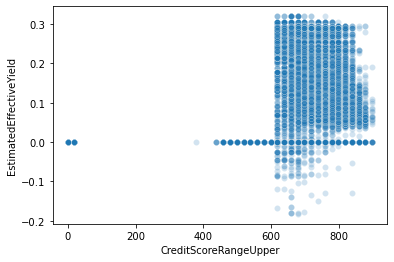

In [74]:
sns.scatterplot(data = df_RvCS, x = 'CreditScoreRangeUpper', y = 'EstimatedEffectiveYield', alpha = .2)

In [75]:
# effective rate vs category: 
df_RvLC = pd.merge(df_Rate,df_List, on = 'ListingKey', how = 'inner')
df_RvLC.head()

,ListingKey,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,IsBorrowerHomeowner,ListingCategory (numeric)
0,1021339766868145413AB3B,0.16516,0.1580,0.1380,0.00000,0.0000,0.00000,True,0
1,10273602499503308B223C1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,False,2
2,0EE9337825851032864889A,0.28269,0.2750,0.2400,0.00000,0.0000,0.00000,False,0
3,0EF5356002482715299901A,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,True,16
4,0F023589499656230C5E3E2,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,True,2


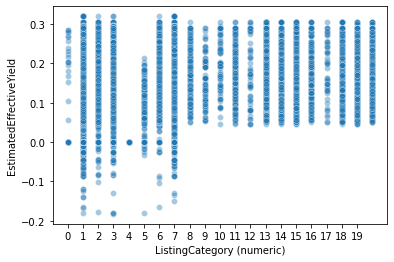

In [76]:
sns.scatterplot(data = df_RvLC, x = 'ListingCategory (numeric)', y = 'EstimatedEffectiveYield', alpha = .4)
plt.xticks(np.arange(0,20,1));

Listing category has no effect on estimated yield, this is surprising, I would have thought otherwise.

In [77]:
# credit score vs credit lines and revolving accounts

In [78]:
df_CSvCLR = pd.merge(df_CScore, df_Revolv, on = 'ListingKey', how = 'inner')
df_CSvCLR[['CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
           'TotalCreditLinespast7years', 'OpenRevolvingAccounts']].describe()

,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts
count,115787.000000,115787.000000,115787.000000,115787.000000,115787.000000
mean,701.061812,9.659236,8.675162,26.608030,6.991018
std,82.866515,5.862654,5.373854,13.738926,4.633358
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,679.000000,6.000000,5.000000,17.000000,4.000000
50%,699.000000,9.000000,8.000000,25.000000,6.000000
75%,739.000000,13.000000,12.000000,35.000000,9.000000
max,899.000000,59.000000,54.000000,136.000000,51.000000


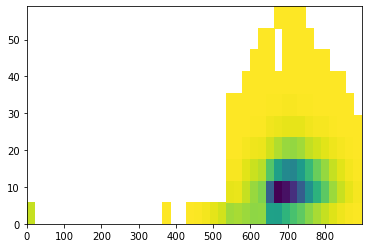

In [79]:
bins = (42,10)
plt.hist2d(data = df_CSvCLR, x = 'CreditScoreRangeUpper', y = 'CurrentCreditLines', bins = bins,
          cmin = 1, cmap = 'viridis_r');

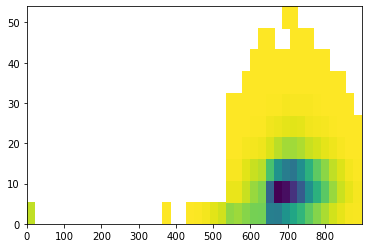

In [80]:
bins = (42,10)
plt.hist2d(data = df_CSvCLR, x = 'CreditScoreRangeUpper', y = 'OpenCreditLines', bins = bins,
          cmin = 1, cmap = 'viridis_r');

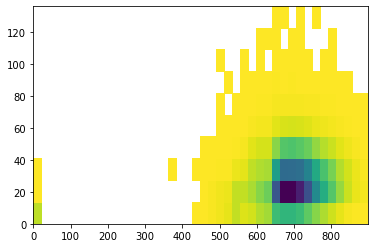

In [81]:
bins = (42,10)
plt.hist2d(data = df_CSvCLR, x = 'CreditScoreRangeUpper', y = 'TotalCreditLinespast7years', bins = bins,
          cmin = 1, cmap = 'viridis_r');

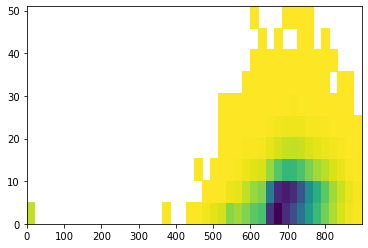

In [82]:
bins = (42,10)
plt.hist2d(data = df_CSvCLR, x = 'CreditScoreRangeUpper', y = 'OpenRevolvingAccounts', bins = bins,
          cmin = 1, cmap = 'viridis_r');

Notice  that the majority of people with credit scores in the 650-750 range also have similar numbers of open accounts and revolving accounts.

In [83]:
# Look at credit score vs loan amounts
df_CSvLA = pd.merge(df_CScore, df_Amount, on = 'ListingKey', how = 'inner')

(400.0, 950.0)

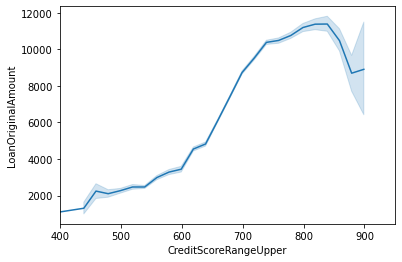

In [84]:
sns.lineplot(data = df_CSvLA, x = 'CreditScoreRangeUpper', y = 'LoanOriginalAmount')
plt.xlim(400,950)

As expected there is a general increase in the loan amounts with an increase in the credit range, the broader
total loans at the end is not too unsurprising as people with better credit will apply for loans for a broader 
range of needs.

In [85]:
# credit vs. incomerange
df_CvIR = pd.merge(df_CScore, df_Income, on = 'ListingKey', how = 'inner')
df_CvIR.head()

,ListingKey,ProsperRating (numeric),DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,ScorexChangeAtTimeOfListing,ProsperScore,PublicRecordsLast12Months,PublicRecordsLast10Years,combRating,deltaCreditScore,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,1021339766868145413AB3B,0,2007-08-26 18:41:46.780,640.0,659.0,0.0,0,0,0,C,19.0,"$25,000-49,999",True,3083.333333
1,10273602499503308B223C1,6,2014-02-27 08:28:14.000,680.0,699.0,0.0,7,0,1,A,19.0,"$50,000-74,999",True,6125.000000
2,0EE9337825851032864889A,0,2007-01-02 14:09:10.060,480.0,499.0,0.0,0,0,0,HR,19.0,Not displayed,True,2083.333333
3,0EF5356002482715299901A,6,2012-10-22 11:02:32.000,800.0,819.0,0.0,9,0,0,A,19.0,"$25,000-49,999",True,2875.000000
4,0F023589499656230C5E3E2,3,2013-09-14 18:38:44.000,680.0,699.0,0.0,4,0,0,D,19.0,"$100,000+",True,9583.333333


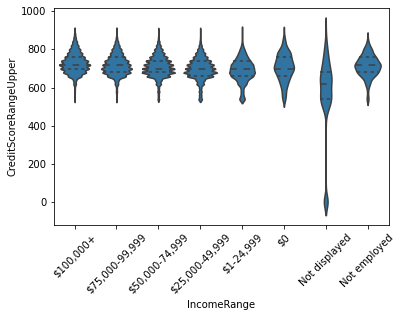

In [86]:
sns.violinplot(data = df_CvIR, x = 'IncomeRange', y = 'CreditScoreRangeUpper', color = bcolor, inner ='quartile')
plt.xticks(rotation = 45);

Credit score ranges narrow down as income gets larger, but they generally have the same shape between 25000 and  99999
with a slightly higher proportion of those over 100,000 being in the middle of the range as opposed to the ends of the range, though the median isabout hte same from 75,000 to 100000+ and slighlty lower between 0 and 74999. What's interesting is the median of the not employed group is slighlty higher than that of the 0-74999 groups. 

## Analysis of factor impacts on Estimated Yield 

At this point I have decided to narrow down my view to see what items impact estimated yield specifically, as the 
primary focus of any loan is to garner the interest from the debtee and allow the business to expand. 

In [87]:
# Estimated yield vs investors:
df_EEYvI= df_Rate[['ListingKey', 'EstimatedEffectiveYield']]
df_EEYvI = pd.merge(df_EEYvI, df_Funded[['ListingKey','Investors']], on = 'ListingKey')
df_EEYvI.head()

,ListingKey,EstimatedEffectiveYield,Investors
0,1021339766868145413AB3B,0.00000,258
1,10273602499503308B223C1,0.07960,1
2,0EE9337825851032864889A,0.00000,41
3,0EF5356002482715299901A,0.08490,158
4,0F023589499656230C5E3E2,0.18316,20


(0.0, 0.3)

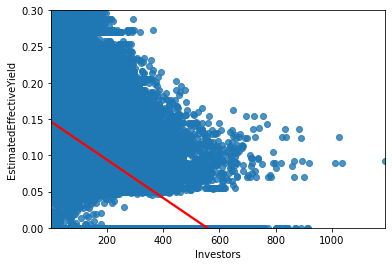

In [88]:
sns.regplot(data = df_EEYvI, x = 'Investors', y = 'EstimatedEffectiveYield', line_kws = {'color' : 'red'})
plt.ylim(0,.3)

Notice there are more individual investors when the effective yield is expected to be lower.

In [89]:
# combrating vs eey(Effectiveestimatedyield)
df_cRvEEY = df_EEYvI.drop(columns = 'Investors').copy()
df_cRvEEY = pd.merge(df_cRvEEY, df_CScore[['ListingKey','combRating']], on = 'ListingKey', how = 'inner')
df_cRvEEY.head()

,ListingKey,EstimatedEffectiveYield,combRating
0,1021339766868145413AB3B,0.00000,C
1,10273602499503308B223C1,0.07960,A
2,0EE9337825851032864889A,0.00000,HR
3,0EF5356002482715299901A,0.08490,A
4,0F023589499656230C5E3E2,0.18316,D


<AxesSubplot:xlabel='combRating', ylabel='EstimatedEffectiveYield'>

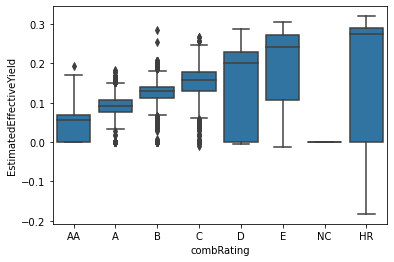

In [90]:
figsize = (4,5)
sns.boxplot(data = df_cRvEEY, x = 'combRating', y = 'EstimatedEffectiveYield', color = bcolor)


Notice that the estimated effective yeild actually goes up as credit rating goes down. Which can be seen most clearly on the 
next plots.

<AxesSubplot:xlabel='combRating', ylabel='CreditScoreRangeUpper'>

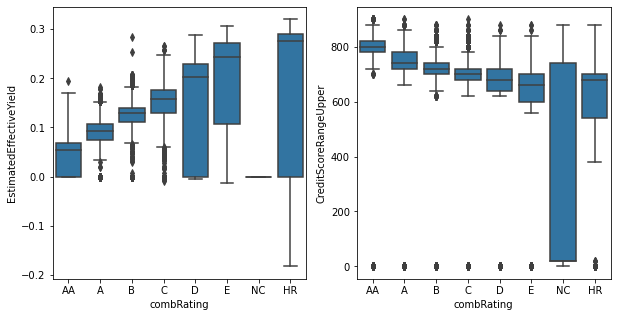

In [91]:
#plot of combrating vs both eey and credit score to show the trends
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(ax = axes[0], data = df_cRvEEY, x = 'combRating', y = 'EstimatedEffectiveYield', color = bcolor)
sns.boxplot(data = df_CScore, x = 'combRating', y = 'CreditScoreRangeUpper', color = bcolor)

In [92]:
#EEY vs. listing category
df_EEYvLC = pd.merge(df_cRvEEY, df_List[['ListingKey','ListingCategory (numeric)']], on = 'ListingKey', how = 'inner')
df_EEYvLC.drop(columns = 'combRating')

,ListingKey,EstimatedEffectiveYield,ListingCategory (numeric)
0,1021339766868145413AB3B,0.00000,0
1,10273602499503308B223C1,0.07960,2
2,0EE9337825851032864889A,0.00000,0
3,0EF5356002482715299901A,0.08490,16
4,0F023589499656230C5E3E2,0.18316,2
...,...,...,...
129786,E6D9357655724827169606C,0.16490,1
129787,E6DB353036033497292EE43,0.10070,7
129788,E6E13596170052029692BB1,0.18828,1
129789,E6EB3531504622671970D9E,0.24450,2


<AxesSubplot:xlabel='ListingCategory (numeric)', ylabel='EstimatedEffectiveYield'>

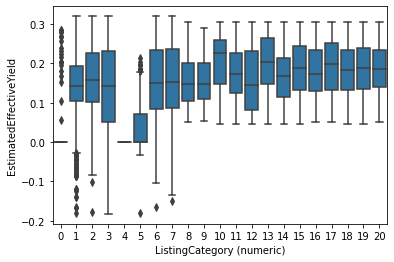

In [93]:
sns.boxplot(data = df_EEYvLC, x = 'ListingCategory (numeric)', y = 'EstimatedEffectiveYield', color = bcolor)


In [94]:
#EEY vs creditline data
df_EEYvCLD = pd.merge(df_cRvEEY, df_Revolv[['ListingKey','OpenRevolvingAccounts','TotalCreditLinespast7years',
                                          'CurrentCreditLines']], on = 'ListingKey', how = 'inner')
df_EEYvCLD.drop(columns = 'combRating', inplace = True)
df_EEYvCLD.head()

,ListingKey,EstimatedEffectiveYield,OpenRevolvingAccounts,TotalCreditLinespast7years,CurrentCreditLines
0,1021339766868145413AB3B,0.00000,1,12,5
1,10273602499503308B223C1,0.07960,13,29,14
2,0EE9337825851032864889A,0.00000,0,3,0
3,0EF5356002482715299901A,0.08490,7,29,5
4,0F023589499656230C5E3E2,0.18316,6,49,19


<AxesSubplot:xlabel='CurrentCreditLines', ylabel='EstimatedEffectiveYield'>

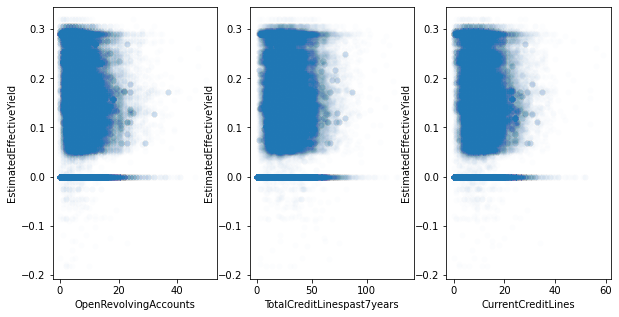

In [95]:
fig, axes = plt.subplots(1,3, figsize = (10,5))
sns.scatterplot(ax = axes[0], data = df_EEYvCLD, x = 'OpenRevolvingAccounts', y = 'EstimatedEffectiveYield', color = bcolor, alpha = .01)
sns.scatterplot(ax = axes[1], data = df_EEYvCLD, x = 'TotalCreditLinespast7years', y = 'EstimatedEffectiveYield', color = bcolor, alpha = .01)
sns.scatterplot(ax = axes[2], data = df_EEYvCLD, x = 'CurrentCreditLines', y = 'EstimatedEffectiveYield', color = bcolor, alpha = .01)

Sampling the data here might clear this up, but it's pretty obvious there is no real relationship between effective yields and credit lines by themselves. 

In [96]:
# EEY vs loan amount
df_EEYvLA = pd.merge(df_cRvEEY, df_Amount[['ListingKey','LoanOriginalAmount']], on = 'ListingKey', how = 'inner')
df_EEYvLA.drop(columns = 'combRating', inplace = True)
df_EEYvLA.head()

,ListingKey,EstimatedEffectiveYield,LoanOriginalAmount
0,1021339766868145413AB3B,0.00000,9425
1,10273602499503308B223C1,0.07960,10000
2,0EE9337825851032864889A,0.00000,3001
3,0EF5356002482715299901A,0.08490,10000
4,0F023589499656230C5E3E2,0.18316,15000


<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='EstimatedEffectiveYield'>

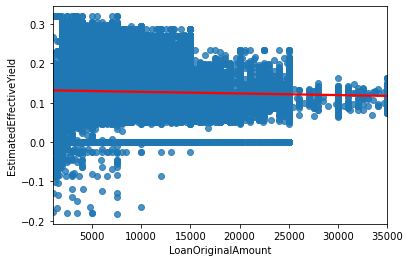

In [97]:
sns.regplot(data = df_EEYvLA, x = 'LoanOriginalAmount', y = 'EstimatedEffectiveYield', line_kws={"color": "red"})

We can see here that larger loans have moderately lower yields than do smaller loans. 

In [98]:
# EEY vs IncomeRange
df_EEYvIR = pd.merge(df_cRvEEY, df_Income[['ListingKey','IncomeRange']], on = 'ListingKey', how = 'inner')
df_EEYvIR.drop(columns = 'combRating', inplace = True)
df_EEYvIR.head()

,ListingKey,EstimatedEffectiveYield,IncomeRange
0,1021339766868145413AB3B,0.00000,"$25,000-49,999"
1,10273602499503308B223C1,0.07960,"$50,000-74,999"
2,0EE9337825851032864889A,0.00000,Not displayed
3,0EF5356002482715299901A,0.08490,"$25,000-49,999"
4,0F023589499656230C5E3E2,0.18316,"$100,000+"


<AxesSubplot:xlabel='EstimatedEffectiveYield', ylabel='IncomeRange'>

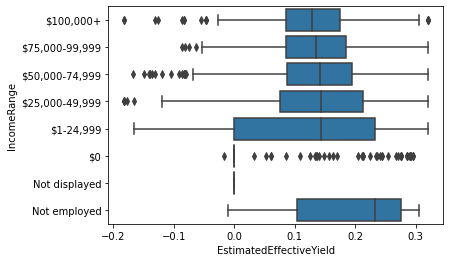

In [99]:
sns.boxplot(data = df_EEYvIR, x = 'EstimatedEffectiveYield', y =  'IncomeRange', color = bcolor)

Notice that for the not-employed effective yeild's bulk is much higher than for any other wage group, with most having the bulk of their yeild closer to 0.1. 

In [100]:
# EEY vs. employment status
df_EEYvES = pd.merge(df_cRvEEY, df_Employment[['ListingKey','EmploymentStatus']], on = 'ListingKey', how = 'inner')
df_EEYvES.drop(columns = 'combRating', inplace = True)
df_EEYvES.head()

,ListingKey,EstimatedEffectiveYield,EmploymentStatus
0,1021339766868145413AB3B,0.00000,Self-employed
1,10273602499503308B223C1,0.07960,Employed
2,0EE9337825851032864889A,0.00000,Not available
3,0EF5356002482715299901A,0.08490,Employed
4,0F023589499656230C5E3E2,0.18316,Employed


<AxesSubplot:xlabel='EstimatedEffectiveYield', ylabel='EmploymentStatus'>

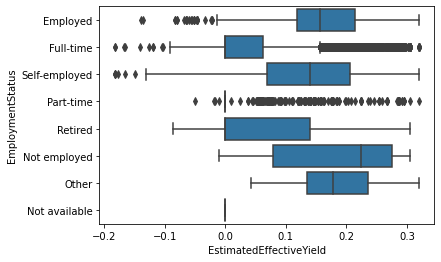

In [101]:
sns.boxplot(data = df_EEYvES, x = 'EstimatedEffectiveYield', y =  'EmploymentStatus', color = bcolor)

This once again shows that the yeild ofloans is considered to be higher from those who are not employed

### Multivariate analysis 

In [102]:
# EEY, Income Range and combRating

df_EEY_IRcR = pd.merge(df_cRvEEY,df_Income[['ListingKey','IncomeRange']], on = 'ListingKey', how = 'inner' )
df_EEY_IRcR.head()

,ListingKey,EstimatedEffectiveYield,combRating,IncomeRange
0,1021339766868145413AB3B,0.00000,C,"$25,000-49,999"
1,10273602499503308B223C1,0.07960,A,"$50,000-74,999"
2,0EE9337825851032864889A,0.00000,HR,Not displayed
3,0EF5356002482715299901A,0.08490,A,"$25,000-49,999"
4,0F023589499656230C5E3E2,0.18316,D,"$100,000+"


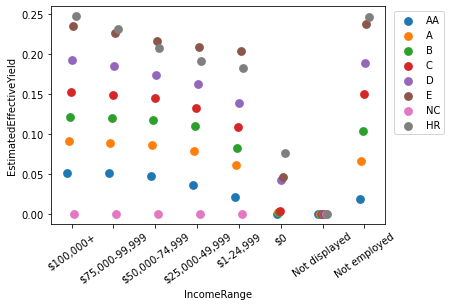

In [103]:
sns.pointplot(data = df_EEY_IRcR, x = 'IncomeRange', y = 'EstimatedEffectiveYield', hue = 'combRating', dodge = True,
             linestyles = '', ci = None)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.xticks(rotation = 35);

Here we can see clearly the impact of Credit Rating, on Yield , and Income on Yield. It is clear that credit rating has a large impact on the overall estimated With lower risk being associated with lower overall yields. 

In [104]:
#let's add in apr to see what the effect is 
df_final = pd.merge(df_EEY_IRcR, df_Rate[['ListingKey', 'BorrowerAPR']], on = 'ListingKey', how = 'inner')
df_final.head()

,ListingKey,EstimatedEffectiveYield,combRating,IncomeRange,BorrowerAPR
0,1021339766868145413AB3B,0.00000,C,"$25,000-49,999",0.16516
1,10273602499503308B223C1,0.07960,A,"$50,000-74,999",0.12016
2,0EE9337825851032864889A,0.00000,HR,Not displayed,0.28269
3,0EF5356002482715299901A,0.08490,A,"$25,000-49,999",0.12528
4,0F023589499656230C5E3E2,0.18316,D,"$100,000+",0.24614


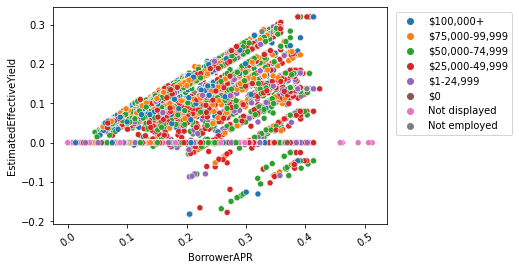

In [105]:
sns.scatterplot(data = df_final, x = 'BorrowerAPR', y = 'EstimatedEffectiveYield', hue = 'IncomeRange')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.xticks(rotation = 35);

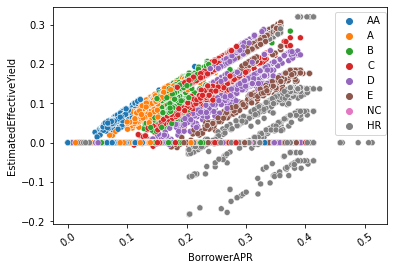

In [106]:
sns.scatterplot(data = df_final, x = 'BorrowerAPR', y = 'EstimatedEffectiveYield', hue = 'combRating')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.xticks(rotation = 35);

Here we can see that in general bands of yield vs APR are formed by people with certain credit ratings.

In [107]:
df_final = pd.merge(df_final, df_Amount[['ListingKey','LoanOriginalAmount']], on = 'ListingKey', how = 'inner')
df_final = pd.merge(df_final, df_Funded[['ListingKey','Investors']], on = 'ListingKey', how = 'inner')
df_final = pd.merge(df_final, df_Employment[['ListingKey', 'EmploymentStatus']], on = 'ListingKey', how = 'inner')
df_final.head()

,ListingKey,EstimatedEffectiveYield,combRating,IncomeRange,BorrowerAPR,LoanOriginalAmount,Investors,EmploymentStatus
0,1021339766868145413AB3B,0.00000,C,"$25,000-49,999",0.16516,9425,258,Self-employed
1,10273602499503308B223C1,0.07960,A,"$50,000-74,999",0.12016,10000,1,Employed
2,0EE9337825851032864889A,0.00000,HR,Not displayed,0.28269,3001,41,Not available
3,0EF5356002482715299901A,0.08490,A,"$25,000-49,999",0.12528,10000,158,Employed
4,0F023589499656230C5E3E2,0.18316,D,"$100,000+",0.24614,15000,20,Employed


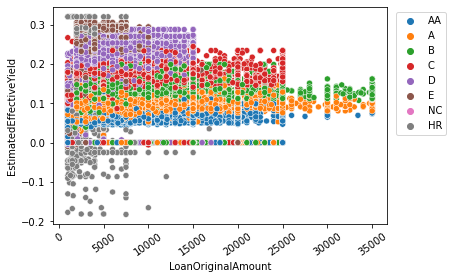

In [108]:
sns.scatterplot(data = df_final, x = 'LoanOriginalAmount', y = 'EstimatedEffectiveYield', hue = 'combRating')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.xticks(rotation = 35);

Another look at the bands this shows us that th egroup with the largest loan values, AA, A, B all tend to have lower yields. 

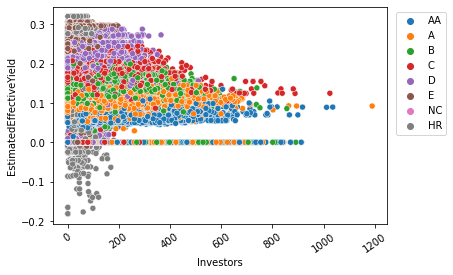

In [109]:
sns.scatterplot(data = df_final, x = 'Investors', y = 'EstimatedEffectiveYield', hue = 'combRating')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.xticks(rotation = 35);

Here we can see thatthe number of investors increases with decreasing risk, AA,A having the largest number, but notice that category C has more investors than B, even with increased risk. 

#### Statistical confirmation 

In [110]:
# linear regression on investors and loan original amount vs effective yield
df_final['Intercept'] = 1
lmfit1 = sm.OLS(df_final.EstimatedEffectiveYield, df_final[['Intercept', 'LoanOriginalAmount', 'Investors']])
results = lmfit1.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:              OLS                     Adj. R-squared:     0.196        
Dependent Variable: EstimatedEffectiveYield AIC:                -9685384.6533
Date:               2021-01-11 06:31        BIC:                -9685346.4988
No. Observations:   2466191                 Log-Likelihood:     4.8427e+06   
Df Model:           2                       F-statistic:        3.001e+05    
Df Residuals:       2466188                 Prob (F-statistic): 0.00         
R-squared:          0.196                   Scale:              0.0011533    
------------------------------------------------------------------------------
                         Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
------------------------------------------------------------------------------
Intercept                0.1830    0.0001  2573.9222  0.0000   0.1828   0.1831
LoanOriginalAmount      -0.0000    0.0000  -533.2307  0.0000  -0.0000  -0.0000
Investors               -0.0002    0.0000  -461.1123  0.0000  -0.0002  -0.0002
-----------------------------------------------------------------------------
Omnibus:               329552.132        Durbin-Watson:           0.715      
Prob(Omnibus):         0.000             Jarque-Bera (JB):        4429989.286
Skew:                  -0.036            Prob(JB):                0.000      
Kurtosis:              9.565             Condition No.:           34403      
=============================================================================
* The condition number is large (3e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [111]:
df_final[['A','B','C','D','E','NC','HR']] = pd.get_dummies(df_final.combRating, drop_first = True)
df_final.head()


,ListingKey,EstimatedEffectiveYield,combRating,IncomeRange,BorrowerAPR,LoanOriginalAmount,Investors,EmploymentStatus,Intercept,A,B,C,D,E,NC,HR
0,1021339766868145413AB3B,0.00000,C,"$25,000-49,999",0.16516,9425,258,Self-employed,1,0,0,1,0,0,0,0
1,10273602499503308B223C1,0.07960,A,"$50,000-74,999",0.12016,10000,1,Employed,1,1,0,0,0,0,0,0
2,0EE9337825851032864889A,0.00000,HR,Not displayed,0.28269,3001,41,Not available,1,0,0,0,0,0,0,1
3,0EF5356002482715299901A,0.08490,A,"$25,000-49,999",0.12528,10000,158,Employed,1,1,0,0,0,0,0,0
4,0F023589499656230C5E3E2,0.18316,D,"$100,000+",0.24614,15000,20,Employed,1,0,0,0,1,0,0,0


In [112]:
# Linerar regression on creditRating vs.  effective yield
lmfit2 = sm.OLS(df_final.EstimatedEffectiveYield, df_final[['Intercept','A','B','C','D','E','NC','HR']])
results = lmfit2.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:              OLS                     Adj. R-squared:     0.703         
Dependent Variable: EstimatedEffectiveYield AIC:                -12144928.6525
Date:               2021-01-11 06:31        BIC:                -12144826.9070
No. Observations:   2466191                 Log-Likelihood:     6.0725e+06    
Df Model:           7                       F-statistic:        8.353e+05     
Df Residuals:       2466183                 Prob (F-statistic): 0.00          
R-squared:          0.703                   Scale:              0.00042541    
---------------------------------------------------------------------------------
                  Coef.     Std.Err.        t        P>|t|      [0.025     0.975]
---------------------------------------------------------------------------------
Intercept         0.0601      0.0001     528.7963    0.0000     0.0599     0.0603
A                 0.0308      0.0001     246.4970    0.0000     0.0305     0.0310
B                 0.0656      0.0001     571.5939    0.0000     0.0653     0.0658
C                 0.0972      0.0001     800.1841    0.0000     0.0970     0.0975
D                 0.1262      0.0001     915.9168    0.0000     0.1260     0.1265
E                 0.1647      0.0001    1102.2807    0.0000     0.1644     0.1650
NC               -0.0601      0.0013     -47.8699    0.0000    -0.0626    -0.0577
HR                0.1959      0.0001    1449.9622    0.0000     0.1956     0.1962
------------------------------------------------------------------------------
Omnibus:               3304122.498       Durbin-Watson:          1.629        
Prob(Omnibus):         0.000             Jarque-Bera (JB):       695534874.391
Skew:                  -7.791            Prob(JB):               0.000        
Kurtosis:              83.783            Condition No.:          122          
==============================================================================

"""

In [116]:
# final check cell this code is used during the writing of the report to check for details that need be mentioned
df_Funded.ListingCreationDate.min(), df_Funded.ListingCreationDate.max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

#### The End
## Thank You.